# Cognitive Models

- Please work in groups of two or more.
- Move chairs together and discuss as you work.
- Commit and show an instructor your work before leaving.

In [69]:
# Run this cell first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import *

### Categorization

Given that no two objects are identical (e.g., cats), how do we group like objects together and recognize them as belonging to the same category? Further, how do people use their knowledge of existing categories to categorize new stimuli?

Psychologists explore these questions using category learning experiments, wherein participants learn novel categories by looking at examples.

Category learning experiments consist of a **learning phase**, where they are shown examples of members of each category (called **exemplars**), and a **testing phase** where they are shown examples and asked to categorize them.

Let's look at a set of stimuli from the learning phase of an experiment on shape categories.

In [70]:
learning_stims = load_learning_phase_stimuli()
learning_stims

,stimulus,category,size,color
0,A1,A,0.35,0.40
1,A2,A,0.28,0.32
2,A3,A,0.40,0.45
3,A4,A,0.30,0.25
4,A5,A,0.36,0.37
5,B1,B,0.45,0.50
6,B2,B,0.38,0.58
7,B3,B,0.50,0.54
8,B4,B,0.43,0.62
9,B5,B,0.48,0.45


The first five stimuli (A1-A5) are members of category A. The second five stimuli (B1-B5) are members of category B.

Each stimulus is defined by its size (radius) and color (shade). You can think of these as the dimensions you might infer by running NMDS on similarity data for the same set of 10 shape stimuli, though some studies use the physical size and color values directly.

Let's see what the psychological space of stimuli look like:

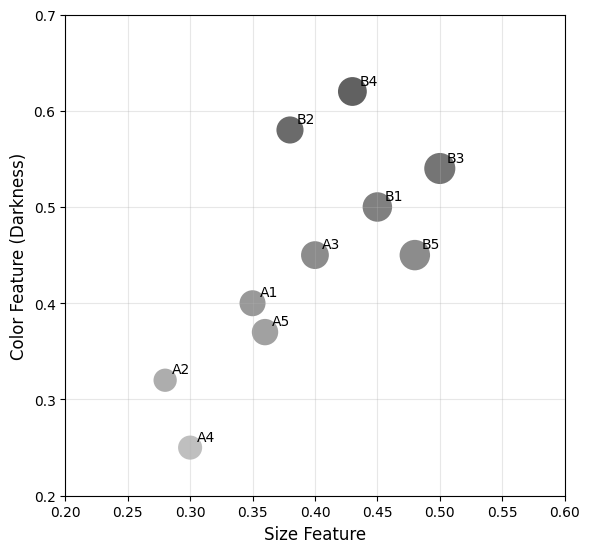

In [71]:
plot_stimuli(learning_stims)

The **prototype model** of categorization posits that learning a category consists of forming an abstraction of that category called a **prototype**. Prototypes are special kinds of mental represenations called **category representations** because they describe entire categories of objects as opposed to individual objects.

Typically, prototypes are computed by taking the average of exemplars from a given category.

**Exercise**: Discuss with your partner why an average might make sense as a summary, abstraction, or idealization of a set of category members. Why might it be a bad representations of a category?

In the case of the current set of stimuli spanning two categories, we define the prototype of category $A$ as $P_A = \frac{1}{n_A} \sum_{i=1}^{n_A} x_i^A$, where $x_i^A$ is the $i$-th exemplar in category $A$ and $n_A$ is the number of exemplars in category $A$.

Similarly, for category $B$, we define prototype $P_B = \frac{1}{n_B} \sum_{j=1}^{n_B} x_j^B$, where $x_j^B$ is the $j$-th exemplar in category $B$ and $n_B$ is the number of exemplars in category $B$.

**Exercise**: Create a function called `compute_prototype` that takes in a dataframe of learning phase stimuli and a category label and returns an prototype for that category as a numpy array. The order of dimensions of the output should match the original dataframe.

In [72]:
# Your code here

def compute_prototype(df, label):
    size = df[df['category'] == label]['size']
    color = df[df['category'] == label]['color']
    return [np.mean(size), np.mean(color)]

In [73]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_prototype(learning_stims, 'A'), np.array([0.338, 0.358])).all():
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise**: Compute the prototype for category A and store the result in a `prototype_A`.

In [74]:
# Your code here
prototype_A = compute_prototype(learning_stims, 'A')


# don't change
prototype_A

[np.float64(0.33799999999999997), np.float64(0.358)]

In [75]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(prototype_A, np.array([0.338, 0.358])).all():
    print('Test passed')
else:
    print('Test failed')

Test passed


**Exercise**: Compute the prototype for category B and store the result in a `prototype_B`.

In [76]:
# Your code here
prototype_B = compute_prototype(learning_stims, 'B')


# don't change
prototype_B

[np.float64(0.44800000000000006), np.float64(0.538)]

In [77]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(prototype_B, np.array([0.448, 0.538])).all():
    print('Test passed')
else:
    print('Test failed')

Test passed


While the prototypes are points in the same space as the stimuli, they are not themselves stimuli (rather, we computed them). In any case, because they are in the same space, we can visualize what these "ideal" examples look like below.

**Exercise:** Discuss with your partner how you would describe these summaries of each category from the prototypes below.

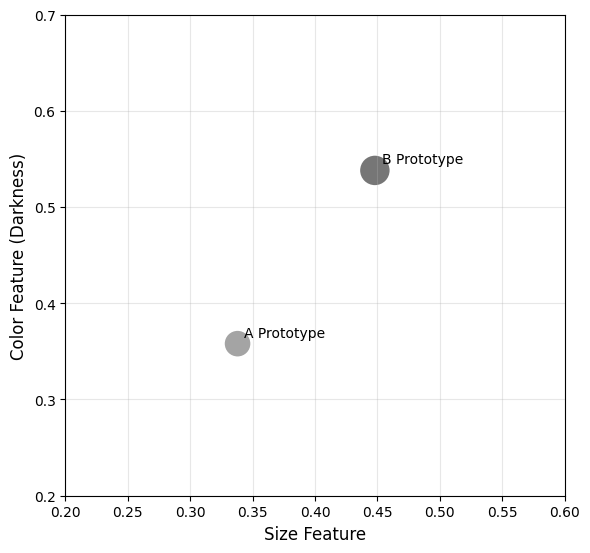

In [78]:
plot_stimuli(learning_stims, stimuli=False, prototypes="render", legend=False)

We can also visualize these prototypes alongside exemplars. The prototypes below are now shown as stars (red for A and blue for B) to help them stand out against the exemplars.

**Exercise:** Discuss with your partner whether these points seem like good summaries of their respective categories. Why or why not?

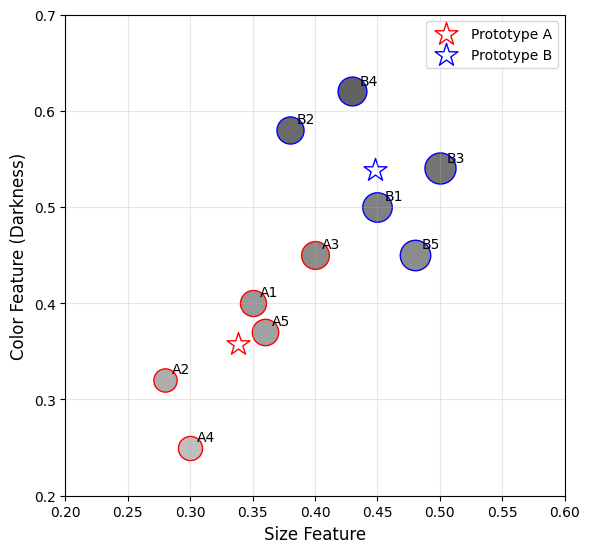

In [79]:
plot_stimuli(learning_stims, prototypes="star", edges=True)

Notice that A3 is relatively far from A4 despite sharing a category, but relatively close to B1 despite not sharing a category.

This helps us understand why average prototypes can be useful. Both A3 and A4 may be somewhat far away from each other, but they are roughly the same distance from their prototype.

This motivates the idea that, in prototype models, it is the distance to the prototype that defines category membership rather than the distance to any single stimulus.

Stimuli that are closer to a prototype than others are said to be more "typical" of that category. For example, A1 and A5 look a lot like the prototype (like the summary of all of the members), while A4 is a bit of an outlier because it is much lighter than the rest of the members. A3 is likewise atypically dark and thus closer to members of category B.

We can thus define a quantitative measure of category typicality for a particular category as the negative Euclidean distance between any single stimulus $z$ and the category prototype in question. For example, in the case of making a comparison with respect to category A, typicality is defined as the negative Euclidean distance between $z$ and $P_A$, denoted as $-d(z, P_A)$.

**Exercise:** Create a function called `compute_typicality` that takes a stimulus as a numpy array and a prototype as a numpy array and returns a single typicality score value.

In [80]:
# Your code here

def compute_typicality(stim, prototype) -> float:
    stim = np.array(stim)
    prototype = np.array(prototype)
    return -np.linalg.norm(stim - prototype)

In [81]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(compute_typicality(np.array([1, 1]), np.array([0, 0])), -1.4142135623730951):
    print('Test passed')
else:
    print('Test failed')

Test passed


Being able to compute typicality also provides a basis for understanding how new stimuli are categorized under the prototype model. 

Given a new stimulus $z$ for which we do not know the correct category label (A vs B), we can assign a category label to $z$ corresponding to the category under which it is most "typical". That is, if $-d(z, P_A) > -d(z, P_B)$, then we categorize $z$ as belonging to category $A$; otherwise we categorize $z$ as belonging to category $B$. This is another way of simply saying that we assign $z$ to the category with the closest (least distant) prototype, e.g., categorizing as $A$ when $d(z, P_A) < d(z, P_B)$.

Thus, the full cognitive model can be specified as:

$$\text{behavior (choose A or not)} = \text{categorize}(z) = \begin{cases} 
1 & \text{if } -d(z, P_A) > -d(z, P_B) \\ 
0 & \text{if } -d(z, P_A) < -d(z, P_B)
\end{cases}$$

**Exercise:** Create a function called `categorize` that takes in a single stimulus as a numpy array along with two category prototypes for A and B, and returns a category label as a string (either `"A"` or `"B"`) for convenience.

In [82]:
# Your code here

def categorize(stim, cat_a, cat_b):
    return "A" if compute_typicality(stim, cat_a) > compute_typicality(stim, cat_b) else "B"

In [83]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if categorize(np.array([0.9, 0.9]), np.array([0.1, 0.1]), np.array([1, 1])) == 'B':
    print('Test passed')
else:
    print('Test failed')

Test passed


Recall that in the testing phase of the experiment, participants are shown new examples and asked to categorize them.

The testing phase data is loaded below.

In [84]:
test_data = load_test_phase_data()
test_data

,stimulus,size,color,categorization
0,Test1,0.30,0.45,A
1,Test2,0.60,0.55,B
2,Test3,0.45,0.50,B
3,Test4,0.35,0.35,A
4,Test5,0.55,0.35,B
5,Test6,0.40,0.60,B
6,Test7,0.25,0.55,A
7,Test8,0.50,0.40,B
8,Test9,0.35,0.60,B


Notice that there is no "category" column with the "right" answer. In this phase, we are only interested in whether the prototype categorization rule results in the same categorization that people make.

The "categorization" column provides the category label guess from a single participant. In most experiments, the guesses from several participants are aggregated into a proportion, but we will evaluate only a single participant now for simplicity.

**Exercise:** Compute predicted categorizations of each of the test stimuli using the prototype model and compare them to the empirical categorizations. Store the proportion correctly predicted in a variable called `accuracy`.

In [92]:
# Your code here
result = 0

for _, row in test_data.iterrows():
    size, color, categorization = row["size"], row["color"], row["categorization"]
    result += 1 if categorize([size, color], prototype_A, prototype_B) == categorization else 0

accuracy = result/len(test_data["size"])

# don't change
print('Accuracy:', accuracy)

Accuracy: 0.7777777777777778


In [93]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(accuracy, 0.7777777777777778):
    print('Test passed')
else:
    print('Test failed')

Test passed


The accuracy of our model is roughly 78%, which is better than what we'd expect if we were guessing randomly.

However, it's important to note that when multiple people categorize the same stimulus, they often give different responses. Even the same person may give different responses to the same stimulus when tested repeatedly. Further stimuli closer to the boundary between categories A and B are usually categorized with less consistency than stimuli far from the boundary. How can we account for this variability?

First, let's look at test phase data for more than just one participant. The `prop_chose_A` column in the `test_props` dataframe below gives the proportion of participants that assigned each stimulus to category A. (Note that the proportion who chose category B is just 1 - prop_chose_A). For stimulus "Test1", most participants chose A (.85, or 85%), whereas for stimulus "Test9", participant choices were split 50/50. This pattern of results would make sense if say stimulus "Test1" had high typicality under category A. That is, we expect that examples more typical of a category will be assigned to that category at a higher rate. Thus, our goal is a model that can predict `prop_chose_A`.

In [94]:
test_props = load_test_phase_data(with_proportions=True)
test_props

,stimulus,size,color,prop_chose_A
0,Test1,0.30,0.45,0.85
1,Test2,0.60,0.55,0.10
2,Test3,0.45,0.50,0.40
3,Test4,0.35,0.35,0.70
4,Test5,0.55,0.35,0.15
5,Test6,0.40,0.60,0.30
6,Test7,0.25,0.55,0.60
7,Test8,0.50,0.40,0.25
8,Test9,0.35,0.60,0.50


To understand how our model might predict these proportions, let's first consider that we are working with distances rather than similarities. Shepard's Law tells us that $s = e^{-d}$. Since we've already defined typicality to be $-d$, we can convert typicalities to similarities by simply applying an exponential function.

**Exercise:** Create a function called `typicality_to_similarity` that takes in a typicality value and returns a similarity value.

In [95]:
# Your code here

def typicality_to_similarity(val):
    return np.exp(val)

In [96]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(typicality_to_similarity(-0.1), 0.9048374180359595):
    print('Test passed')
else:
    print('Test failed')

Test passed


If we define the similarity between a stimulus $z$ and prototype $P_A$ as $s(z, P_A) = e^{-d(z, P_A)}$, then we can model the probability that a person will categorize $z$ as belonging to category A using the ratio:

$$P(\text{categorize } z \text{ as A}) = \frac{s(z, P_A)}{s(z, P_A) + s(z, P_B)}.$$

That is, the probability of choosing A goes up when the stimulus is more similar to prototype A and less similar to prototype B.

This approach, known as the similarity-choice rule, provides a natural way to predict the proportion of participants who will classify a stimulus as belonging to category A. When a stimulus is very similar to prototype A and dissimilar to prototype B, the probability approaches 1. When similarities are equal, the probability is 0.5, reflecting uncertainty between the categories.

Note that $P(\text{categorize } z \text{ as B}) = 1 - P(\text{categorize } z \text{ as A})$, or we can also substitute $P_B$ for $P_A$ in the similarity-choice rule formula above.

Unlike our earlier deterministic model that simply assigned category labels based on which prototype was closest, this probabilistic model captures the graded nature of human categorization judgments. This aligns with empirical findings that stimuli near the midpoint between prototypes are categorized less consistently across participants.

**Exercise:** Create a function called `sims_to_prob` that takes in $s(z, P_A)$ and $s(z, P_B)$  and outputs $P(\text{categorize } z \text{ as A})$.

In [97]:
# Your code here

def sims_to_prob(p_a, p_b):
    return p_a / (p_a + p_b)

In [98]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(sims_to_prob(0.9, 0.1), 0.9):
    print('Test passed')
else:
    print('Test failed')

Test passed


Our full cognitive model can now be described as:

$$\text{behavior (choose A with certain probability)} = \text{categorize}(z) = \frac{s(z, P_A)}{s(z, P_A) + s(z, P_B)}.$$

Create a function called `categorize_prob` that takes in a single stimulus as a numpy array along with two category prototypes for A and B, and returns $P(\text{categorize } z \text{ as A})$.

In [ ]:
# Your code here

def categorize_prob(stim, cat_a, cat_b):
    

In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(categorize_prob(np.array([0.9, 0.9]), np.array([0, 0]), np.array([1, 1])), 0.24390820414711514):
    print('Test passed')
else:
    print('Test failed')

**Exercise:** Calculate $P(\text{categorize } z \text{ as A})$ for test stimulus "Test3" (index 2 of the dataframe) and store the result in `prob_choose_A`.

In [ ]:
# Your code here



In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(prob_choose_A, 0.4643603092806735):
    print('Test passed')
else:
    print('Test failed')

**Exercise:** Store the actual observed rate that participants chose test stimulus "Test3" in a variable called `prop_choose_A_observed`.

In [ ]:
# Your code here



In [ ]:
# TEST YOUR SOLUTION

# DON'T CHANGE THIS CELL
if np.isclose(prop_choose_A_observed, 0.4):
    print('Test passed')
else:
    print('Test failed')

Below we can see that our prediction and the original proportion are comparable. First, both are a value between 0 and 1. Second, the values are fairly similar. The prototype model made what appears to be a "good" prediction for this particular data point.

In a future assignment, we will learn more about quantifying the fit between the predictions of a model and observed behavior.

In [ ]:
print('Predicted probability of categorizing z as A:', float(prob_choose_A))
print('Actual probability of categorizing z as A:', prop_choose_A_observed)

Does the mind actually make use of prototypes to learn categories and categorize new stimuli?

Answering this question with certainty is not an easy task. It requires at the least comparing the predictions of multiple competing accounts (models) to diverse behavioral datasets.

For example, one alternative account of categorization is called the **exemplar model**. Inspired by related empirical results, along with the simple fact that the mind clearly remembers specific examples of members of categories, the exemplar model posits that category representations are simply collections of previously experienced examples stored in memory. Categorization of a new stimulus is thus purely a function of comparison to existing memories rather than to any kind of abstraction such as a prototype. We will explore such competing accounts in a future exercise.